# CS 459 Business Intelligence

## Data Wrangling - Cleaning Data Sets before Analysis

##### Instructor: Ms. Abeera Tariq

This notebook presents an overview of fundamental Data Wrangling concepts. Students are open to explore this notebook by running on the provided dataset and add their interpretations. Wrtiting and executing python code is not the real task, these steps and strategies will evolve with changing datasets and what matters is how the analyst interprets the results and ensures to generate a clean dataset for analysis.

### Loading Data and Basic Analysis

In [2]:
#importing the basic libraries
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
#read the CSV file
missingdf = pd.read_csv("Missing.Value.Data.csv")

In [4]:
# display first few rows
missingdf.head()

,S.No,Customer.ID,Customer.Name,Customer.Age,Date,Product.Bought,Quantity,Sales
0,1,100.0,Ahmed,23.0,12/10/2019,Water Bottle,2.0,945.0
1,2,101.0,Ahmed,23.0,13/10/2019,Power Switch,1.0,324.0
2,3,102.0,Saim,16.0,14/10/2019,Fridge,1.0,45000.0
3,4,103.0,Farhan,34.0,15/10/2019,Mobile,1.0,33000.0
4,5,104.0,Imran,45.0,16/10/2019,Table,NaN,17900.0


In [5]:
#list all columns
missingdf.columns

Index(['S.No', 'Customer.ID', 'Customer.Name', 'Customer.Age', 'Date',
       'Product.Bought', 'Quantity', 'Sales'],
      dtype='object')

In [6]:
# Accessing columns
missingdf['Sales']

0       945.0
1       324.0
2     45000.0
3     33000.0
4     17900.0
5        24.0
6         NaN
7         NaN
8       453.0
9       433.0
10      762.0
11     1390.0
12        NaN
13        NaN
14    42222.0
15        NaN
16     4232.0
17      111.0
18    10003.0
19     4000.0
20      671.0
21    18000.0
22     3210.0
23        NaN
24     9000.0
25        NaN
26     1032.0
27     3400.0
Name: Sales, dtype: float64

In [7]:
# Multiple columns by names (double brackets[[column names]])
missingdf[['Date','Sales']]

,Date,Sales
0,12/10/2019,945.0
1,13/10/2019,324.0
2,14/10/2019,45000.0
3,15/10/2019,33000.0
4,16/10/2019,17900.0
5,17/10/2019,24.0
6,18/10/2019,NaN
7,19/10/2019,NaN
8,20/10/2019,453.0
9,21/10/2019,433.0


In [8]:
# Accessing data by row - iloc - integer location
missingdf.iloc[0] 

S.No                         1
Customer.ID              100.0
Customer.Name            Ahmed
Customer.Age              23.0
Date                12/10/2019
Product.Bought    Water Bottle
Quantity                   2.0
Sales                    945.0
Name: 0, dtype: object

In [9]:
# Row, Column
missingdf.iloc[0,1]

100.0

In [10]:
# All rows, range of columns
missingdf.iloc[:,0:3]

,S.No,Customer.ID,Customer.Name
0,1,100.0,Ahmed
1,2,101.0,Ahmed
2,3,102.0,Saim
3,4,103.0,Farhan
4,5,104.0,Imran
5,6,105.0,Farrukh
6,7,106.0,Bismah
7,8,107.0,Ayesha
8,9,108.0,Areeba
9,10,109.0,Hashir


In [11]:
# summary of data
missingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   S.No            28 non-null     int64  
 1   Customer.ID     27 non-null     float64
 2   Customer.Name   26 non-null     object 
 3   Customer.Age    24 non-null     float64
 4   Date            28 non-null     object 
 5   Product.Bought  25 non-null     object 
 6   Quantity        22 non-null     float64
 7   Sales           21 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.9+ KB


In [12]:
#see data types
missingdf.dtypes

S.No                int64
Customer.ID       float64
Customer.Name      object
Customer.Age      float64
Date               object
Product.Bought     object
Quantity          float64
Sales             float64
dtype: object

In [13]:
#we have 28 rows and 8 columns
missingdf.shape

(28, 8)

In [14]:
missingdf.describe()

,S.No,Customer.ID,Customer.Age,Quantity,Sales
count,28.000000,27.000000,24.000000,22.000000,21.000000
mean,14.500000,112.111111,38.541667,1.772727,9338.666667
std,8.225975,8.692762,22.198667,1.020356,14056.934631
min,1.000000,100.000000,11.000000,0.000000,24.000000
25%,7.750000,104.500000,23.000000,1.000000,671.000000
50%,14.500000,111.000000,32.500000,2.000000,3210.000000
75%,21.250000,120.000000,43.500000,2.000000,10003.000000
max,28.000000,127.000000,86.000000,5.000000,45000.000000


In [15]:
#See the NaN values in some of the columns - these are the missing values
missingdf

,S.No,Customer.ID,Customer.Name,Customer.Age,Date,Product.Bought,Quantity,Sales
0,1,100.0,Ahmed,23.0,12/10/2019,Water Bottle,2.0,945.0
1,2,101.0,Ahmed,23.0,13/10/2019,Power Switch,1.0,324.0
2,3,102.0,Saim,16.0,14/10/2019,Fridge,1.0,45000.0
3,4,103.0,Farhan,34.0,15/10/2019,Mobile,1.0,33000.0
4,5,104.0,Imran,45.0,16/10/2019,Table,NaN,17900.0
5,6,105.0,Farrukh,56.0,17/10/2019,Stickers,2.0,24.0
6,7,106.0,Bismah,33.0,18/10/2019,Stickers,NaN,NaN
7,8,107.0,Ayesha,31.0,19/10/2019,Water Bottle,1.0,NaN
8,9,108.0,Areeba,27.0,20/10/2019,Milk,2.0,453.0
9,10,109.0,Hashir,78.0,21/10/2019,Milk,2.0,433.0


In [16]:
# Filtering data 
filtered_data = missingdf[missingdf['Customer.Age'] > 18]
# Display columns - list of column names
filtered_data[['Customer.Name','Customer.Age']]
# sort results

,Customer.Name,Customer.Age
0,Ahmed,23.0
1,Ahmed,23.0
3,Farhan,34.0
4,Imran,45.0
5,Farrukh,56.0
6,Bismah,33.0
7,Ayesha,31.0
8,Areeba,27.0
9,Hashir,78.0
10,Qasim,86.0


In [17]:
#sort by age
sorted_df = filtered_data.sort_values(by='Customer.Age', ascending=False)

sorted_df[['Customer.Name','Customer.Age']]

,Customer.Name,Customer.Age
27,Qasim,86.0
10,Qasim,86.0
9,Hashir,78.0
26,Hashir,78.0
5,Farrukh,56.0
4,Imran,45.0
22,Ahmed,43.0
11,Fatima,41.0
3,Farhan,34.0
15,Farhan,34.0


## Duplicates

In [18]:
duplicate_count = missingdf.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)
data = missingdf.drop_duplicates() ## remove duplicates / unncessary rows

Number of duplicate rows: 0


## Handling Missing Values

In [19]:
missingdf.dtypes

S.No                int64
Customer.ID       float64
Customer.Name      object
Customer.Age      float64
Date               object
Product.Bought     object
Quantity          float64
Sales             float64
dtype: object

In [21]:
#we need to do some type casting here, but with missing values we cannot cast (the following will give an error)
missingdf['Customer.ID'] = missingdf['Customer.ID'].astype(int) 

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [22]:
#we remove missings first. Let's see how many missings we have
missingdf.isnull().sum()

S.No              0
Customer.ID       1
Customer.Name     2
Customer.Age      4
Date              0
Product.Bought    3
Quantity          6
Sales             7
dtype: int64

In [23]:
#Dealing first with Customer.ID (let's see the distribution)
missingdf['Customer.ID'].value_counts()

Customer.ID
102.0    3
100.0    1
113.0    1
126.0    1
125.0    1
124.0    1
123.0    1
122.0    1
121.0    1
119.0    1
116.0    1
115.0    1
114.0    1
112.0    1
101.0    1
111.0    1
110.0    1
109.0    1
108.0    1
107.0    1
106.0    1
105.0    1
104.0    1
103.0    1
127.0    1
Name: count, dtype: int64

### Filling by Mode

In [24]:
#let us replace the one missing value by the mode, i.e., 102
missingdf['Customer.ID'].fillna(102,inplace=True)
missingdf.isnull().sum()

S.No              0
Customer.ID       0
Customer.Name     2
Customer.Age      4
Date              0
Product.Bought    3
Quantity          6
Sales             7
dtype: int64

In [25]:
#now, we can cast the customer ID to string (more logical)
missingdf['Customer.ID'] = missingdf['Customer.ID'].astype(str)
missingdf.dtypes

S.No                int64
Customer.ID        object
Customer.Name      object
Customer.Age      float64
Date               object
Product.Bought     object
Quantity          float64
Sales             float64
dtype: object

In [26]:
#now, let's tackle Customer Name, which has 2 missing values
missingdf['Customer.Name'].value_counts()

Customer.Name
Ahmed       3
Saim        3
Farhan      3
Farrukh     2
Areeba      2
Hashir      2
Qasim       2
Ismail      2
Imran       1
Bismah      1
Ayesha      1
Fatima      1
Junaid      1
Ibraheem    1
Amjad       1
Name: count, dtype: int64

In [27]:
missingdf

,S.No,Customer.ID,Customer.Name,Customer.Age,Date,Product.Bought,Quantity,Sales
0,1,100.0,Ahmed,23.0,12/10/2019,Water Bottle,2.0,945.0
1,2,101.0,Ahmed,23.0,13/10/2019,Power Switch,1.0,324.0
2,3,102.0,Saim,16.0,14/10/2019,Fridge,1.0,45000.0
3,4,103.0,Farhan,34.0,15/10/2019,Mobile,1.0,33000.0
4,5,104.0,Imran,45.0,16/10/2019,Table,NaN,17900.0
5,6,105.0,Farrukh,56.0,17/10/2019,Stickers,2.0,24.0
6,7,106.0,Bismah,33.0,18/10/2019,Stickers,NaN,NaN
7,8,107.0,Ayesha,31.0,19/10/2019,Water Bottle,1.0,NaN
8,9,108.0,Areeba,27.0,20/10/2019,Milk,2.0,453.0
9,10,109.0,Hashir,78.0,21/10/2019,Milk,2.0,433.0


### Logical Replacement of Missing Values

In [28]:
#Customer.Names are associated with an ID. If ID is there and name is missing, 
#we can get the name from the other row
#this is because ID 102 is repeated in 3 rows; if one of these rows contains missing name, we can get it from others

#find out the IDs where names are missing (119, 102)
print(missingdf[missingdf['Customer.Name'].isna()]['Customer.ID'])

#find out customer names associated with these IDs
IDs = ['102.0','119.0']
missingdf[missingdf['Customer.ID'].isin(IDs)]

19    119.0
20    102.0
Name: Customer.ID, dtype: object


,S.No,Customer.ID,Customer.Name,Customer.Age,Date,Product.Bought,Quantity,Sales
2,3,102.0,Saim,16.0,14/10/2019,Fridge,1.0,45000.0
17,18,102.0,Saim,NaN,29/10/2019,Water Bottle,1.0,111.0
18,19,102.0,Saim,NaN,30/10/2019,NaN,5.0,10003.0
19,20,119.0,NaN,NaN,31/10/2019,Clothes,2.0,4000.0
20,21,102.0,NaN,23.0,01/11/2019,NaN,1.0,671.0


In [29]:
# we can replace the missing customer name with 102 Customer ID with Saim.
#ID 119 is a different person but as Customer Name is less imp than ID, so we will go with Saim here

missingdf['Customer.Name'].fillna('Saim',inplace=True)
missingdf.isnull().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12636\2318036298.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  missingdf['Customer.Name'].fillna('Saim',inplace=True)


S.No              0
Customer.ID       0
Customer.Name     0
Customer.Age      4
Date              0
Product.Bought    3
Quantity          6
Sales             7
dtype: int64

In [30]:
missingdf['Customer.Name'].value_counts()

Customer.Name
Saim        5
Ahmed       3
Farhan      3
Farrukh     2
Areeba      2
Hashir      2
Qasim       2
Ismail      2
Imran       1
Bismah      1
Ayesha      1
Fatima      1
Junaid      1
Ibraheem    1
Amjad       1
Name: count, dtype: int64

38.541666666666664


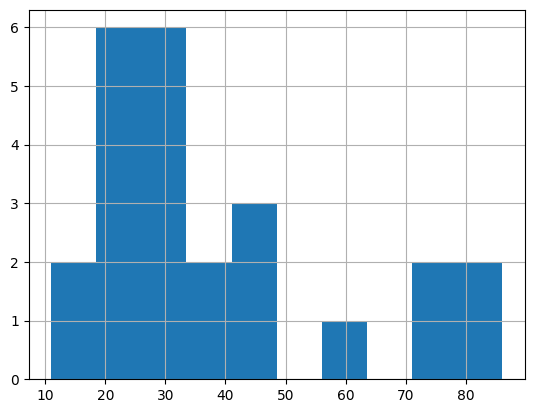

In [31]:
#let's see the distribution of age
missingdf['Customer.Age'].hist()
print(missingdf['Customer.Age'].mean())

### Imputation with Mean

<Axes: >

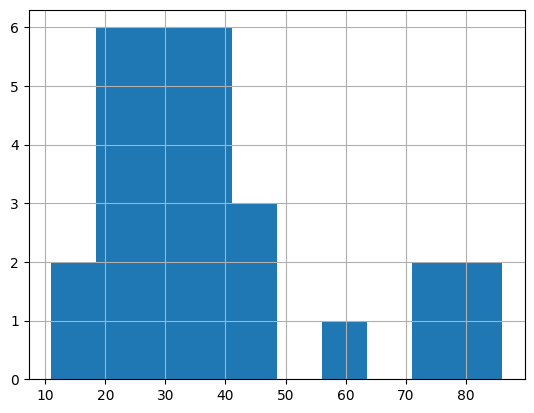

In [32]:
#its safe to approximate the age as mean
missingdf['Age.Modified'] = missingdf['Customer.Age'].fillna(missingdf['Customer.Age'].mean())
missingdf['Age.Modified'].hist()

In [33]:
missingdf

,S.No,Customer.ID,Customer.Name,Customer.Age,Date,Product.Bought,Quantity,Sales,Age.Modified
0,1,100.0,Ahmed,23.0,12/10/2019,Water Bottle,2.0,945.0,23.000000
1,2,101.0,Ahmed,23.0,13/10/2019,Power Switch,1.0,324.0,23.000000
2,3,102.0,Saim,16.0,14/10/2019,Fridge,1.0,45000.0,16.000000
3,4,103.0,Farhan,34.0,15/10/2019,Mobile,1.0,33000.0,34.000000
4,5,104.0,Imran,45.0,16/10/2019,Table,NaN,17900.0,45.000000
5,6,105.0,Farrukh,56.0,17/10/2019,Stickers,2.0,24.0,56.000000
6,7,106.0,Bismah,33.0,18/10/2019,Stickers,NaN,NaN,33.000000
7,8,107.0,Ayesha,31.0,19/10/2019,Water Bottle,1.0,NaN,31.000000
8,9,108.0,Areeba,27.0,20/10/2019,Milk,2.0,453.0,27.000000
9,10,109.0,Hashir,78.0,21/10/2019,Milk,2.0,433.0,78.000000


In [34]:
missingdf.isnull().sum()

S.No              0
Customer.ID       0
Customer.Name     0
Customer.Age      4
Date              0
Product.Bought    3
Quantity          6
Sales             7
Age.Modified      0
dtype: int64

### Interpolation

<Axes: >

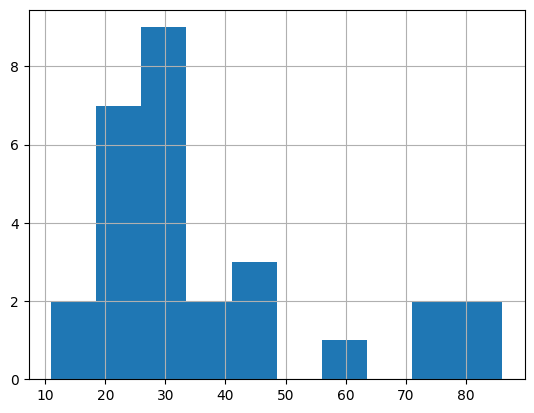

In [35]:
#we can also use interpolation technique (forward linear)
missingdf['Age.Interpolate'] = missingdf['Customer.Age'].interpolate(method ='linear', limit_direction ='forward')
missingdf['Age.Interpolate'].hist()

In [36]:
missingdf

,S.No,Customer.ID,Customer.Name,Customer.Age,Date,Product.Bought,Quantity,Sales,Age.Modified,Age.Interpolate
0,1,100.0,Ahmed,23.0,12/10/2019,Water Bottle,2.0,945.0,23.000000,23.0
1,2,101.0,Ahmed,23.0,13/10/2019,Power Switch,1.0,324.0,23.000000,23.0
2,3,102.0,Saim,16.0,14/10/2019,Fridge,1.0,45000.0,16.000000,16.0
3,4,103.0,Farhan,34.0,15/10/2019,Mobile,1.0,33000.0,34.000000,34.0
4,5,104.0,Imran,45.0,16/10/2019,Table,NaN,17900.0,45.000000,45.0
5,6,105.0,Farrukh,56.0,17/10/2019,Stickers,2.0,24.0,56.000000,56.0
6,7,106.0,Bismah,33.0,18/10/2019,Stickers,NaN,NaN,33.000000,33.0
7,8,107.0,Ayesha,31.0,19/10/2019,Water Bottle,1.0,NaN,31.000000,31.0
8,9,108.0,Areeba,27.0,20/10/2019,Milk,2.0,453.0,27.000000,27.0
9,10,109.0,Hashir,78.0,21/10/2019,Milk,2.0,433.0,78.000000,78.0


<Axes: >

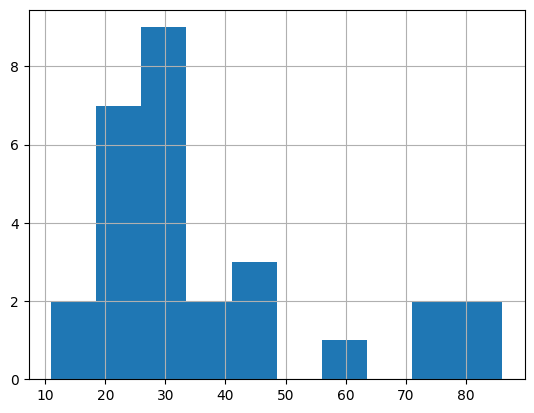

In [37]:
#we can also use interpolation technique (backward linear)
missingdf['Age.Interpolate.2'] = missingdf['Customer.Age'].interpolate(method ='linear', limit_direction ='backward')
missingdf['Age.Interpolate.2'].hist()

In [38]:
missingdf

,S.No,Customer.ID,Customer.Name,Customer.Age,Date,Product.Bought,Quantity,Sales,Age.Modified,Age.Interpolate,Age.Interpolate.2
0,1,100.0,Ahmed,23.0,12/10/2019,Water Bottle,2.0,945.0,23.000000,23.0,23.0
1,2,101.0,Ahmed,23.0,13/10/2019,Power Switch,1.0,324.0,23.000000,23.0,23.0
2,3,102.0,Saim,16.0,14/10/2019,Fridge,1.0,45000.0,16.000000,16.0,16.0
3,4,103.0,Farhan,34.0,15/10/2019,Mobile,1.0,33000.0,34.000000,34.0,34.0
4,5,104.0,Imran,45.0,16/10/2019,Table,NaN,17900.0,45.000000,45.0,45.0
5,6,105.0,Farrukh,56.0,17/10/2019,Stickers,2.0,24.0,56.000000,56.0,56.0
6,7,106.0,Bismah,33.0,18/10/2019,Stickers,NaN,NaN,33.000000,33.0,33.0
7,8,107.0,Ayesha,31.0,19/10/2019,Water Bottle,1.0,NaN,31.000000,31.0,31.0
8,9,108.0,Areeba,27.0,20/10/2019,Milk,2.0,453.0,27.000000,27.0,27.0
9,10,109.0,Hashir,78.0,21/10/2019,Milk,2.0,433.0,78.000000,78.0,78.0


In [39]:
#tackling product bought
print(missingdf['Product.Bought'].value_counts())

#lets check the rows where values are missing
missingdf[missingdf['Product.Bought'].isna()]

Product.Bought
Water Bottle    4
Power Switch    3
Fruits          3
Clothes         3
Mobile          2
Table           2
Stickers        2
Milk            2
Laptop          2
Fridge          1
Rug             1
Name: count, dtype: int64


,S.No,Customer.ID,Customer.Name,Customer.Age,Date,Product.Bought,Quantity,Sales,Age.Modified,Age.Interpolate,Age.Interpolate.2
16,17,116.0,Areeba,NaN,28/10/2019,NaN,2.0,4232.0,38.541667,31.8,31.8
18,19,102.0,Saim,NaN,30/10/2019,NaN,5.0,10003.0,38.541667,27.4,27.4
20,21,102.0,Saim,23.0,01/11/2019,NaN,1.0,671.0,23.000000,23.0,23.0


In [40]:
# If we look at the sales, then we cannot make any assumptions regarding the product bought unless we know more or can find out more.
# Worst case: If we are unable to find a logical way, we may drop the rows however its a bad strategy

#missingdf['Product.Bought'].fillna('Clothes',inplace=True)
missingdf.isnull().sum()

# Maybe Clothes is the best answer? Is it really? 

S.No                 0
Customer.ID          0
Customer.Name        0
Customer.Age         4
Date                 0
Product.Bought       3
Quantity             6
Sales                7
Age.Modified         0
Age.Interpolate      0
Age.Interpolate.2    0
dtype: int64

## <span style="background-color: yellow">Activity (5 mins) |  Devise a strategy to find the missing product in the logical way - which is the best fit for products in these rows. </span>


In [ ]:
# When you use fillna() with the inplace=True argument, it modifies the existing DataFrame directly, 
# without needing to create a new DataFrame or column. 
# This means that the NaN values are filled in the original DataFrame itself.
# so we remove the columns no longer required.
missingdf = missingdf.drop('Customer.Age',axis=1)
print(missingdf.columns)

In [ ]:
# Also drop the age columns that are not needed
missingdf = missingdf.drop(['Age.Interpolate.2','Age.Modified'],axis=1)
print(missingdf.columns)

In [ ]:
missingdf.isnull().sum()

In [ ]:
# For quantity and sales, we will adopt the same approach as age
# These are critical indicators and we cannot delete rows if they are missing. 
# Let's see the distribution of Quantity
missingdf['Quantity'].hist()
print(missingdf['Quantity'].mean())

In [ ]:
missingdf['Quantity.Interpolate'] = missingdf['Quantity'].interpolate(method ='linear', limit_direction ='backward')
missingdf['Quantity.Interpolate'].hist()

In [ ]:
missingdf

In [ ]:
missingdf['Sales'].hist()
print(missingdf['Sales'].mean())

In [ ]:
missingdf['Sales.Interpolate'] = missingdf['Sales'].interpolate(method ='linear', limit_direction ='backward')
missingdf['Sales.Interpolate'].hist()

In [ ]:
missingdf

## <span style="background-color: yellow">Is Interpolation or Mean Imputation truly the best strategy here? </span>

In [ ]:
missingdf.isnull().sum()

In [ ]:
# Removing the original columns for a neat look at the dataset
missingdf = missingdf.drop(['Quantity','Sales'],axis=1)
missingdf.isnull().sum()

## Data Inconsistencies and Enhancement

In [ ]:
# List all columns
missingdf.columns

In [ ]:
pd.unique(missingdf['Product.Bought'])

In [ ]:
pd.unique(missingdf['Customer.Name'])

### As you do this for all columns, you will identify columns which may have garbage values which need to be treated/transformed to something more meaningful. 
### Standardize inconsistent values (e.g., converting "Male" ,"M", or 0 to "Male").
### Correct data entry errors where possible.

In [ ]:
missingdf['Date'] 

## Discretization

In [ ]:
# Define the age groups and labels
age_bins = [0, 18, 35, 50, 65, float('inf')]  # Define age bin edges float(inf) represents +ve infinity
age_labels = ['0-18', '19-35', '36-50', '51-65', '66+']  # Labels for each age group

# Perform discretization using cut() with labels
missingdf['age_group'] = pd.cut(missingdf['Age.Interpolate'], bins=age_bins, labels=age_labels, right=False)

# View the resulting DataFrame
print(missingdf[['Age.Interpolate','age_group']])


### To Try and Explore

In [ ]:
# Cater for data type inconsistencies if any. Convert data types (e.g., strings to numeric, datetime conversion).
# Ensure consistency in date formats, units, etc.

In [ ]:
# Rethink column name conventions. Smaller and more meaningful names appear better on visualizations

In [ ]:
# Explore standardization and normalization

## Output the clean dataset and save a copy

In [ ]:
# Output the clean dataset
clean_file_path = "clean_data.csv"
missingdf.to_csv(clean_file_path, index=False)

# Print a message indicating the file path where the clean dataset is saved
print("Clean dataset saved to:", clean_file_path)